In [1]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple
import math

## 数据观察

In [2]:
df_train = pd.read_csv("train.csv")
display(df_train.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### 删除空缺值过多的列
- 部分列在训练集和测试集中空缺值很多，将这些列删除
- 空缺率大于30%的将进行列删除

In [3]:
##输出除了Id列全部是缺失值的行
empty_rows = df_train[df_train.drop(columns=['Id']).isnull().all(axis=1)]
print(empty_rows)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [4]:
df_test = pd.read_csv("test.csv")
fig = plt.figure(dpi=500, figsize=(40, 20))
ax1 = fig.add_subplot(121)
ax1.set_title('train')
ax2 = fig.add_subplot(122)
ax2.set_title('test')
msn.bar(df_train, ax=ax1)
msn.bar(df_test, ax=ax2)

<Axes: title={'center': 'test'}>

In [5]:
delcols = df_train.isnull().sum().sort_values(ascending=False)
delcols = delcols/len(df_train)
print("空缺率:\n", delcols[:10])

空缺率:
 PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
GarageCond     0.055479
GarageType     0.055479
dtype: float64


In [6]:
delcols = delcols[delcols>0.3].index.to_list()
print("会被删除的列:\n", delcols)

会被删除的列:
 ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


(1460, 81)
(1460, 75)


<Axes: >

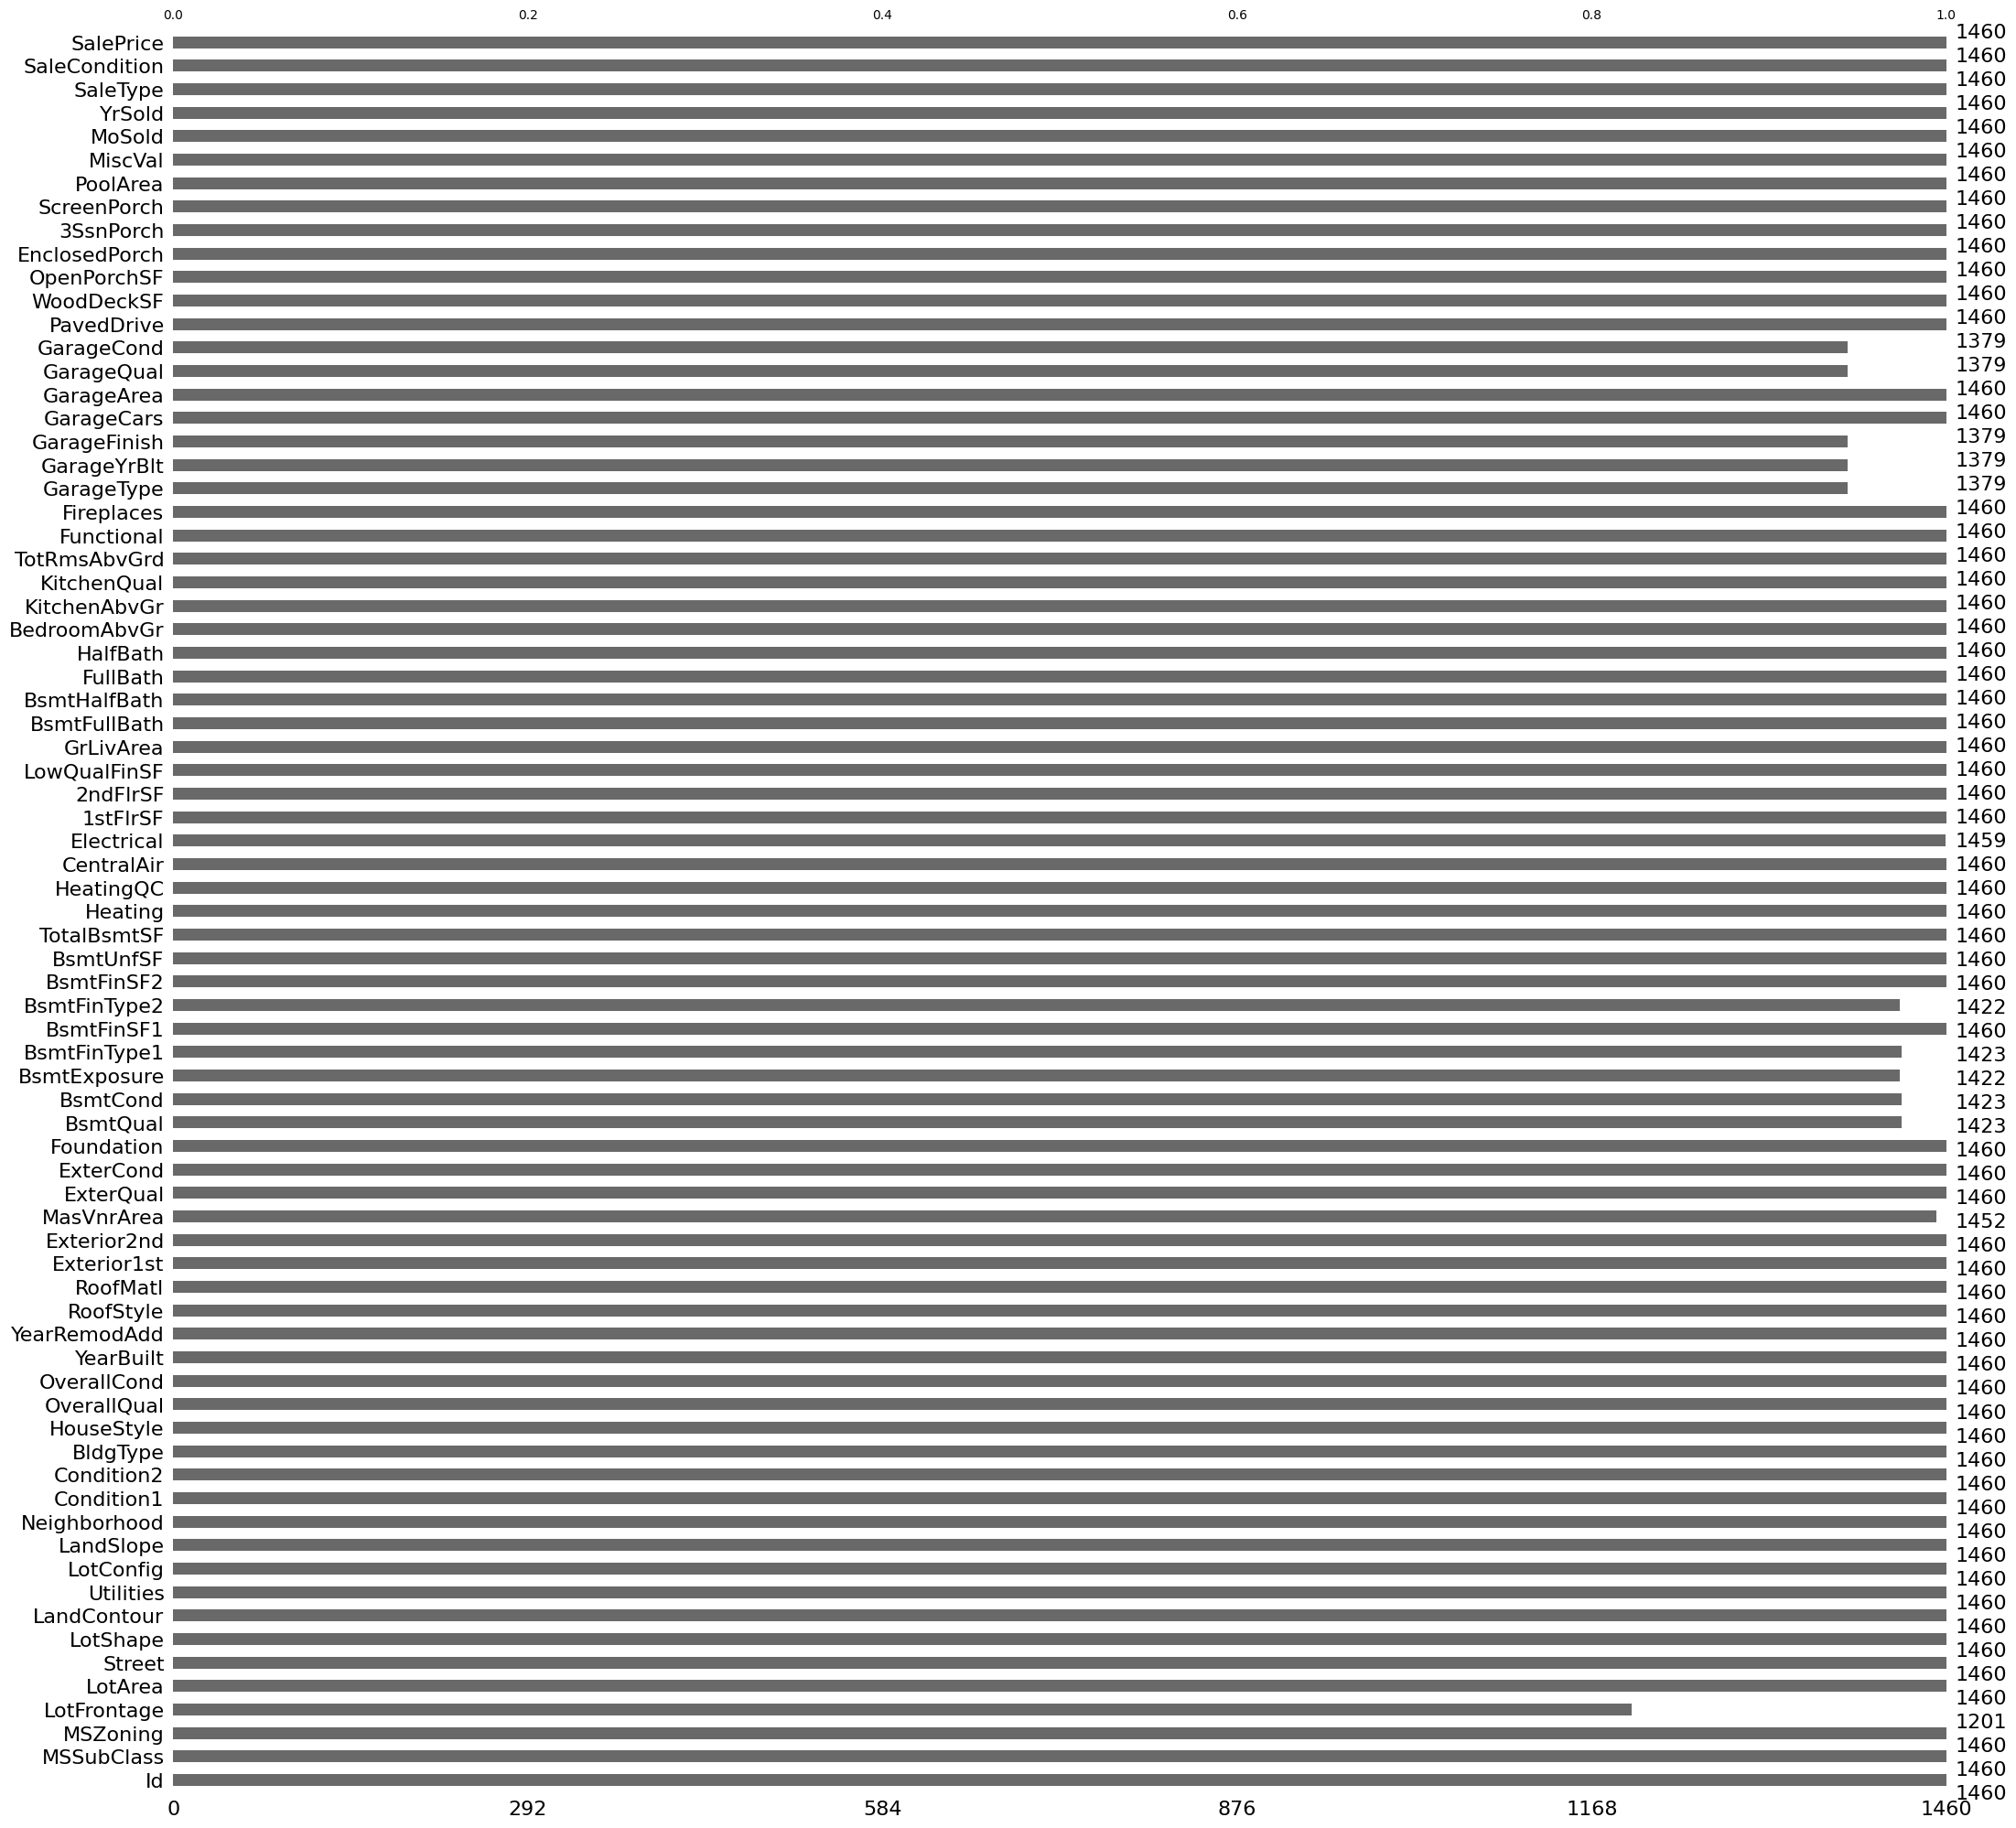

In [7]:
print(df_train.shape)
df_train = df_train.drop(columns=delcols)
print(df_train.shape)
msn.bar(df_train)

#### 根据列的数据类型划分连续型属性和离散型属性

In [8]:
p = df_train.dtypes.to_dict() 
dtype_col:Dict[str, List[str]] = dict()
for ele in set(p.values()):
    temp = []
    ele = str(ele)
    for key in p.keys():
        if p[key] == ele:
            temp.append(key)
    dtype_col[ele] = temp
    print(ele, len(temp), temp)

object 37 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
int64 35 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice

In [9]:
type_col:Dict[str, List[str]] = dict()
type_col['continue'] = dtype_col['int64'] + dtype_col['float64']
type_col['discrete'] = dtype_col['object']
print(len(type_col['continue']), type_col['continue'])
print(len(type_col['discrete']), type_col['discrete'])

38 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
37 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDri

## 数据预处理

### 连续型属性

#### 画图

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
36
36


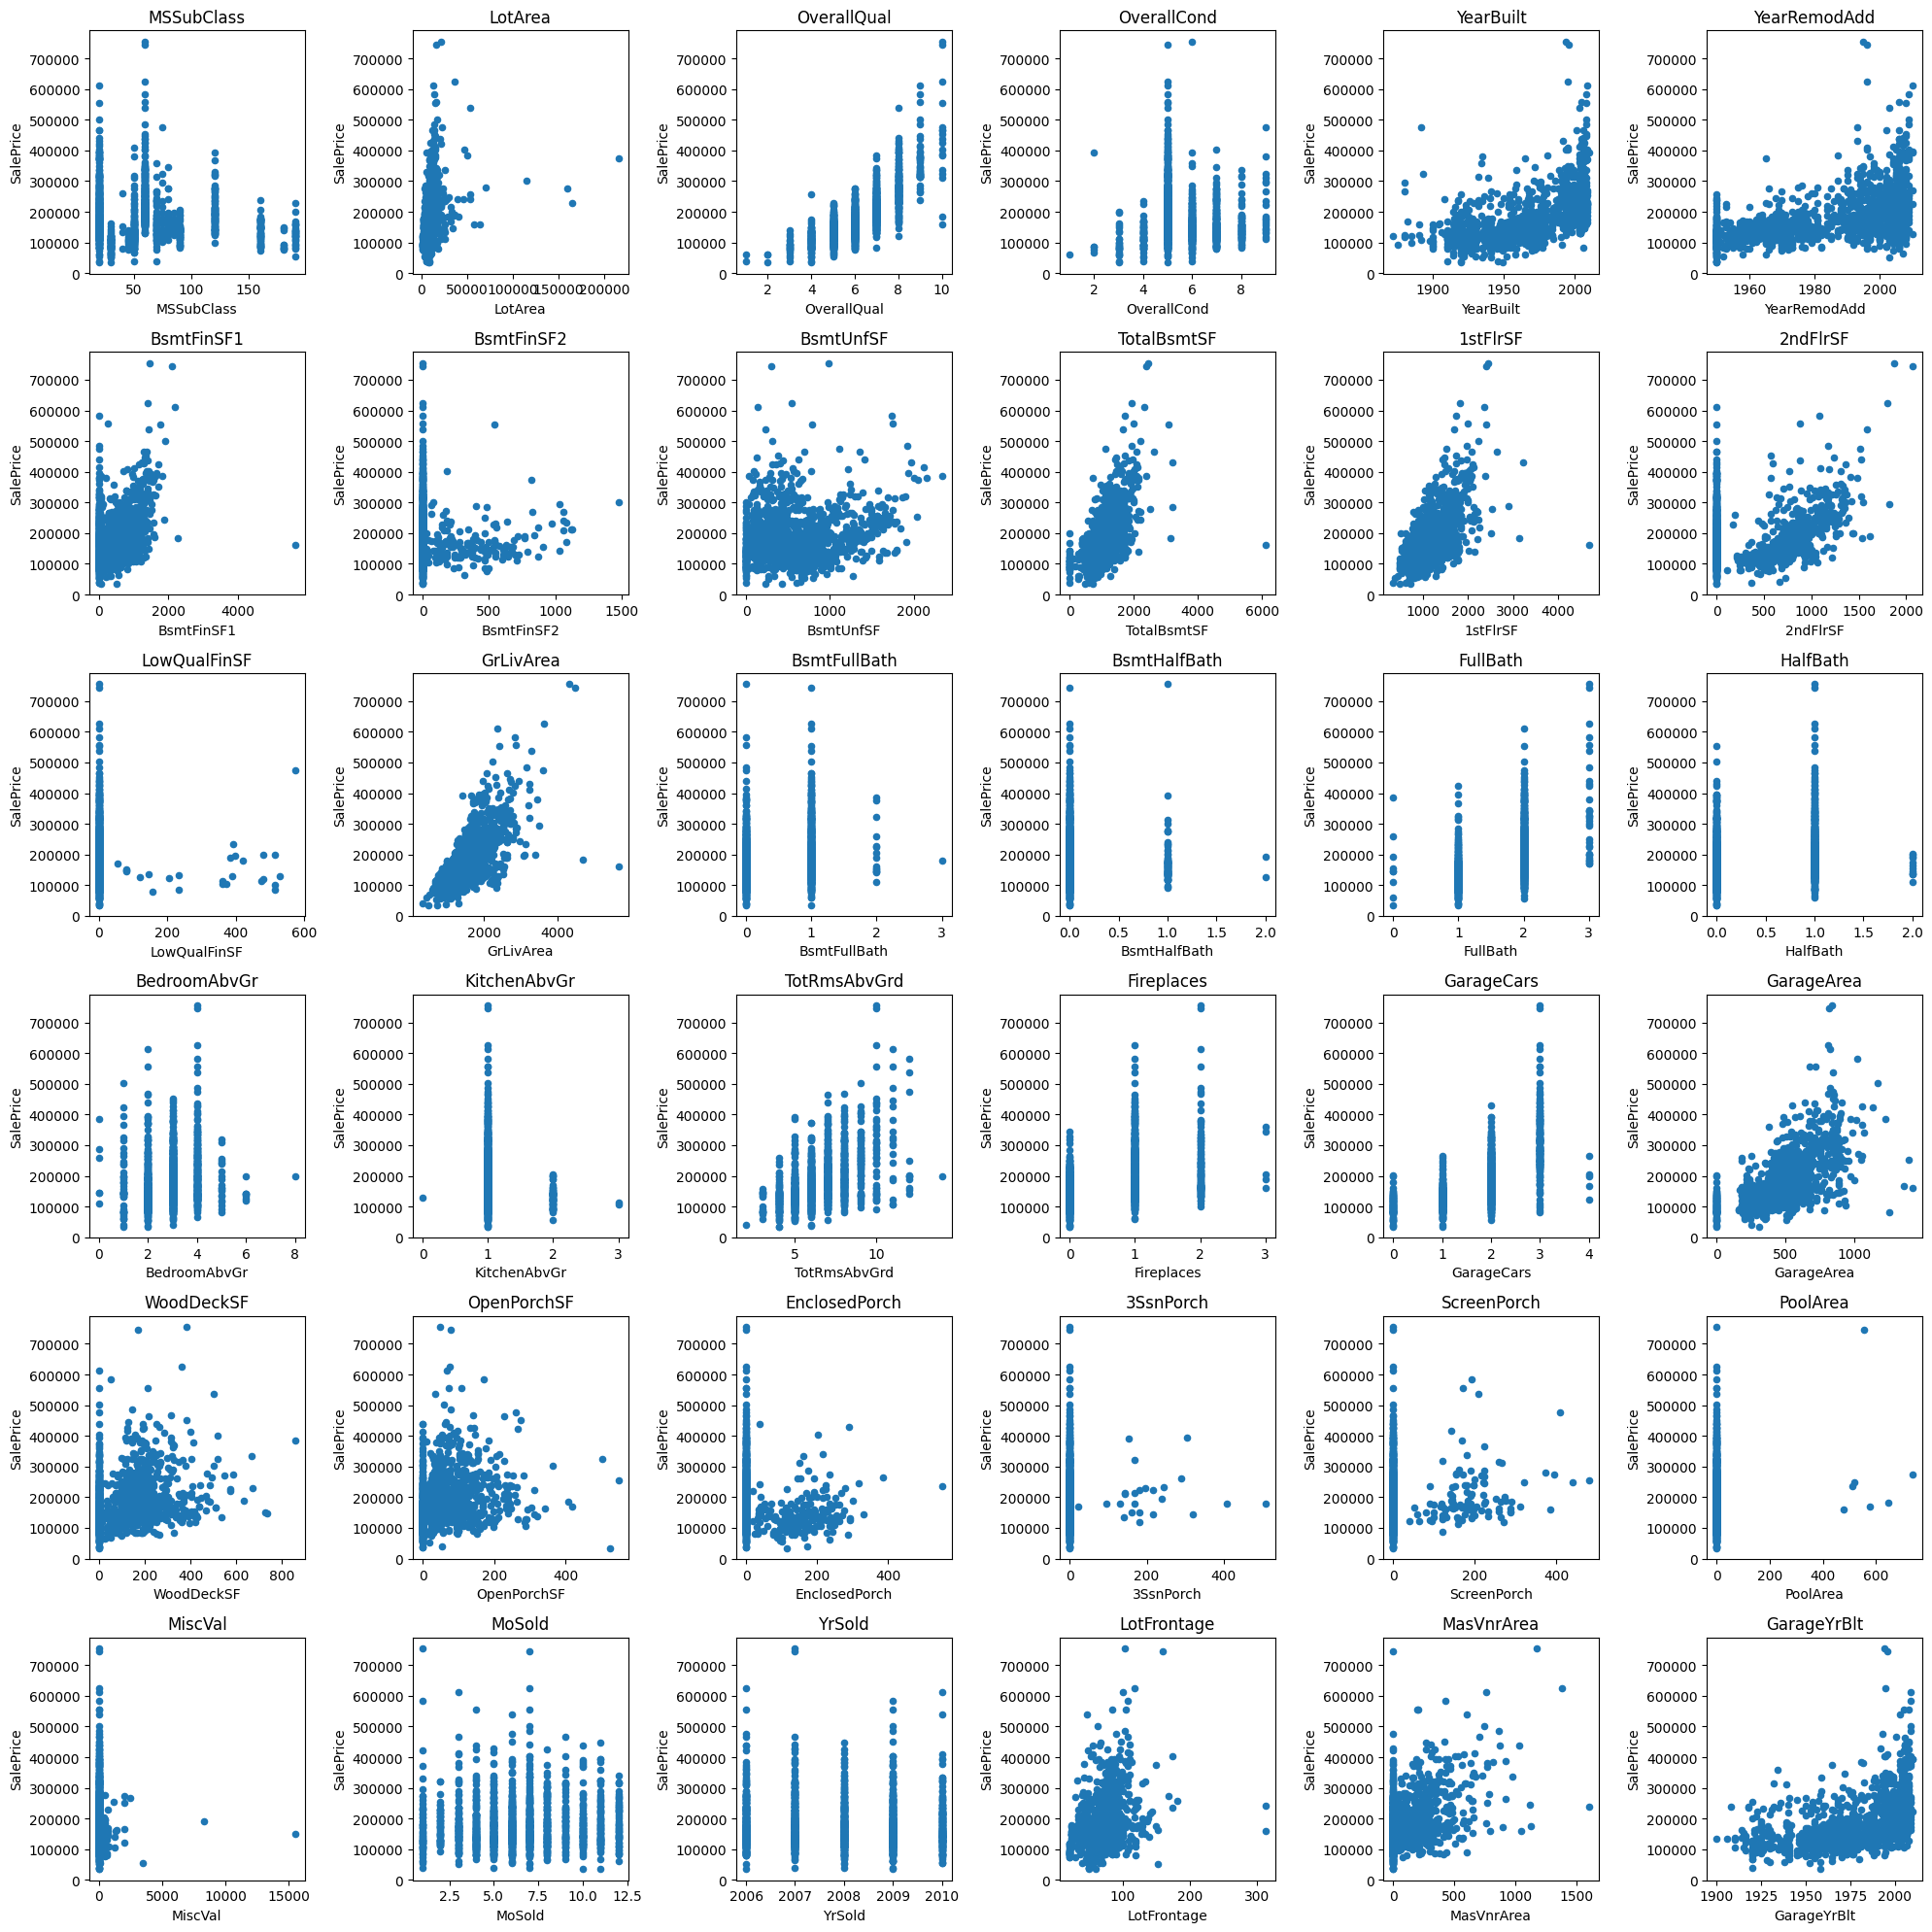

In [10]:
draw = type_col['continue'].copy()
draw.remove('SalePrice')
draw.remove('Id')
print(draw)
print(len(draw))
print(len(draw))
f = plt.figure(figsize=(20, 20))
for i in range(len(draw)):
    ax = f.add_subplot(6,6,i+1)
    df_train.plot(x=draw[i], y ='SalePrice', kind='scatter', ax=ax)
    ax.set_title(draw[i])
f.tight_layout()

### 离散型属性

In [11]:
for ele in type_col['discrete']:
    print(ele, df_train[ele].value_counts().to_dict())

MSZoning {'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
Street {'Pave': 1454, 'Grvl': 6}
LotShape {'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
LandContour {'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
Utilities {'AllPub': 1459, 'NoSeWa': 1}
LotConfig {'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}
LandSlope {'Gtl': 1382, 'Mod': 65, 'Sev': 13}
Neighborhood {'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2}
Condition1 {'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2}
Condition2 {'Norm': 1445, 'Feedr': 6, 'Artery': 2, 'RRNn': 2, 'PosN': 2, 'PosA': 1, 'RRAn': 1, 'RRAe': 1}
BldgType {

### 空缺值填充
- 对于连续型属性：采取列均值进行填充
- 对于离散型属性：采取用该列中最多出现的进行填充（Null值除外）

In [12]:
for colname in df_train.columns:
    if df_train[colname].isna().sum() != 0:
        print(df_train[colname].dtype, colname, '含有空值' ,df_train[colname].isna().sum())
        if df_train[colname].dtype == 'object':
            df_train[colname] = df_train[colname].fillna(df_train[colname].mode()[0])
        elif df_train[colname].dtype == 'int64' or df_train[colname].dtype == 'float64':
            df_train[colname] = df_train[colname].fillna(df_train[colname].mean())
        else:
            raise ValueError("未知数据类型")

float64 LotFrontage 含有空值 259
float64 MasVnrArea 含有空值 8
object BsmtQual 含有空值 37
object BsmtCond 含有空值 37
object BsmtExposure 含有空值 38
object BsmtFinType1 含有空值 37
object BsmtFinType2 含有空值 38
object Electrical 含有空值 1
object GarageType 含有空值 81
float64 GarageYrBlt 含有空值 81
object GarageFinish 含有空值 81
object GarageQual 含有空值 81
object GarageCond 含有空值 81


填充之后的df_train


<Axes: >

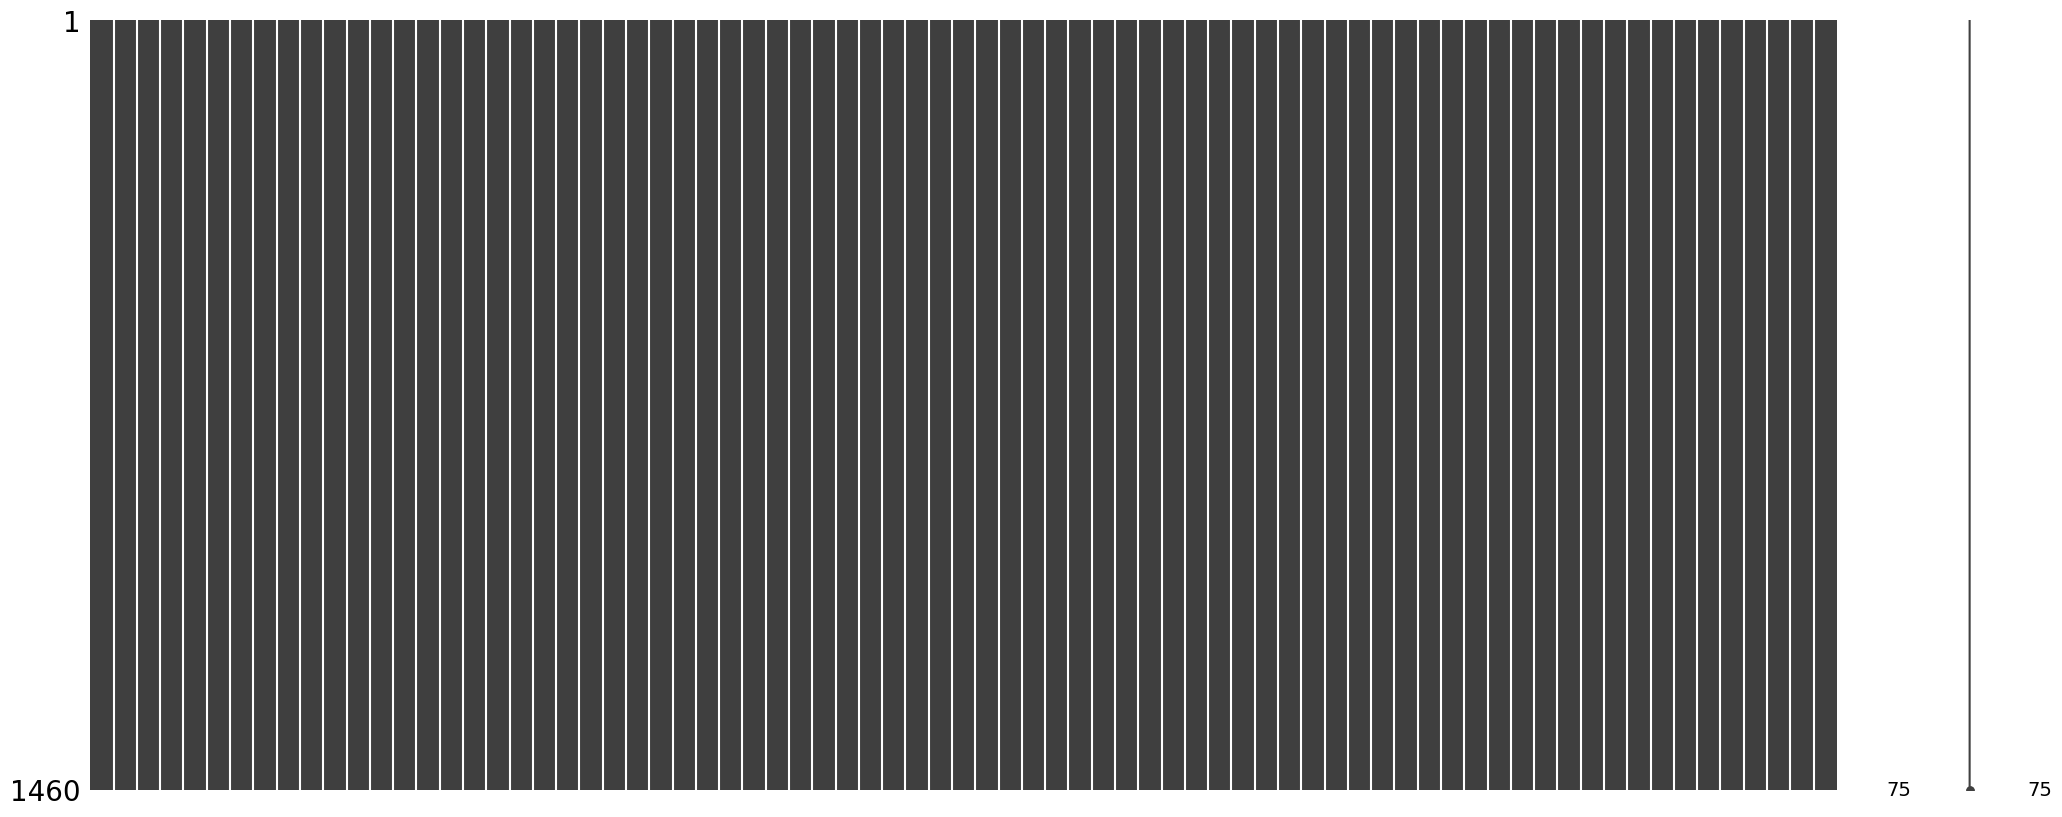

In [13]:
print("填充之后的df_train")
msn.matrix(df_train)

### 删除df_train中Id字段，划分属性集合与最终结果SalePrice
- 也对连续型属性和离散型属性的字典进行修改

In [14]:
X_train, y_train = df_train.drop(columns=['SalePrice', 'Id']), df_train['SalePrice']

In [15]:
print(type_col['continue'])
type_col['continue'].remove('SalePrice')
type_col['continue'].remove('Id')
print(type_col['continue'])

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrA

### 对于连续型（数值型）数据进行数据标准化

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train[type_col['continue']] = scaler.fit_transform(X_train[type_col['continue']])
display(X_train[type_col['continue']].head())

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.073375 -0.207142     0.651479    -0.517200   1.050994      0.878668   
1   -0.872563 -0.091886    -0.071836     2.179628   0.156734     -0.429577   
2    0.073375  0.073480     0.651479    -0.517200   0.984752      0.830215   
3    0.309859 -0.096897     0.651479    -0.517200  -1.863632     -0.720298   
4    0.073375  0.375148     1.374795    -0.517200   0.951632      0.733308   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  EnclosedPorch  \
0    0.575425   -0.288653  -0.944591    -0.459303  ...      -0.359325   
1    1.171992   -0.288653  -0.641228     0.466465  ...      -0.359325   
2    0.092907   -0.288653  -0.301643    -0.313369  ...      -0.359325   
3   -0.499274   -0.288653  -0.061670    -0.687324  ...       4.092524   
4    0.463568   -0.288653  -0.174865     0.199680  ...      -0.359325   

   3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  \
0  -0.116339    -0.270208 -0.068692 -0.087688 -1.599111  0.138777   
1  -0.116339    -0.270208 -0.068692 -0.087688 -0.489110 -0.614439   
2  -0.116339    -0.270208 -0.068692 -0.087688  0.990891  0.138777   
3  -0.116339    -0.270208 -0.068692 -0.087688 -1.599111 -1.367655   
4  -0.116339    -0.270208 -0.068692 -0.087688  2.100892  0.138777   

   LotFrontage  MasVnrArea  GarageYrBlt  
0    -0.229372    0.511418     1.021157  
1     0.451936   -0.574410    -0.104483  
2    -0.093110    0.323060     0.937776  
3    -0.456474   -0.574410     0.812705  
4     0.633618    1.364570     0.896086  

[5 rows x 36 columns]

### 对于离散型属性采取onehot编码

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_discrete_arr = encoder.fit_transform(X_train[type_col['discrete']])
encoded_discrete_df = pd.DataFrame(encoded_discrete_arr, columns=encoder.get_feature_names_out(type_col['discrete']))
X_train = pd.concat([X_train.drop(columns=type_col['discrete']), encoded_discrete_df], axis=1)

### 数据预处理与特征工程之后的X_train

In [20]:
display(X_train.head())
print(X_train.shape)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.878668    0.511418    0.575425   -0.288653  ...             0.0   
1     -0.429577   -0.574410    1.171992   -0.288653  ...             0.0   
2      0.830215    0.323060    0.092907   -0.288653  ...             0.0   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...             0.0   
4      0.733308    1.364570    0.463568   -0.288653  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 266 columns]

(1460, 266)


## 评估函数
- 即预测值和真实值之间的误差计算方法
- 参照网站上的要求

In [21]:
def cal_acc(real:list, pred:list)->float:
    if len(real) != len(pred):
        raise ValueError("输入的长度不一致")
    N = len(real)
    summary = sum([(math.log(p)-math.log(r))**2 for p, r in zip(pred, real)])
    rmse = (summary/N)**0.5
    return rmse

## 模型训练
- 使用的方法主要为随机森林

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=13)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [25]:
y_train_pred = model.predict(X_train)
print("在训练集上的误差", cal_acc(y_train.to_list(), y_train_pred))

在训练集上的误差 0.05876237258950698


## 模型预测

### 对测试集数据进行与训练集数据一样的预处理

#### 删除空缺值过多的列

In [26]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(columns=delcols)

#### 空缺值填补

In [27]:
for colname in df_test.columns:
    if df_test[colname].isna().sum() != 0:
        print(df_test[colname].dtype, colname, '含有空值' ,df_test[colname].isna().sum())
        if df_test[colname].dtype == 'object':
            df_test[colname] = df_test[colname].fillna(df_test[colname].mode()[0])
        elif df_test[colname].dtype == 'int64' or df_test[colname].dtype == 'float64':
            df_test[colname] = df_test[colname].fillna(df_test[colname].mean())
        else:
            raise ValueError("未知数据类型")

object MSZoning 含有空值 4
float64 LotFrontage 含有空值 227
object Utilities 含有空值 2
object Exterior1st 含有空值 1
object Exterior2nd 含有空值 1
float64 MasVnrArea 含有空值 15
object BsmtQual 含有空值 44
object BsmtCond 含有空值 45
object BsmtExposure 含有空值 44
object BsmtFinType1 含有空值 42
float64 BsmtFinSF1 含有空值 1
object BsmtFinType2 含有空值 42
float64 BsmtFinSF2 含有空值 1
float64 BsmtUnfSF 含有空值 1
float64 TotalBsmtSF 含有空值 1
float64 BsmtFullBath 含有空值 2
float64 BsmtHalfBath 含有空值 2
object KitchenQual 含有空值 1
object Functional 含有空值 2
object GarageType 含有空值 76
float64 GarageYrBlt 含有空值 78
object GarageFinish 含有空值 78
float64 GarageCars 含有空值 1
float64 GarageArea 含有空值 1
object GarageQual 含有空值 78
object GarageCond 含有空值 78
object SaleType 含有空值 1


<Axes: >

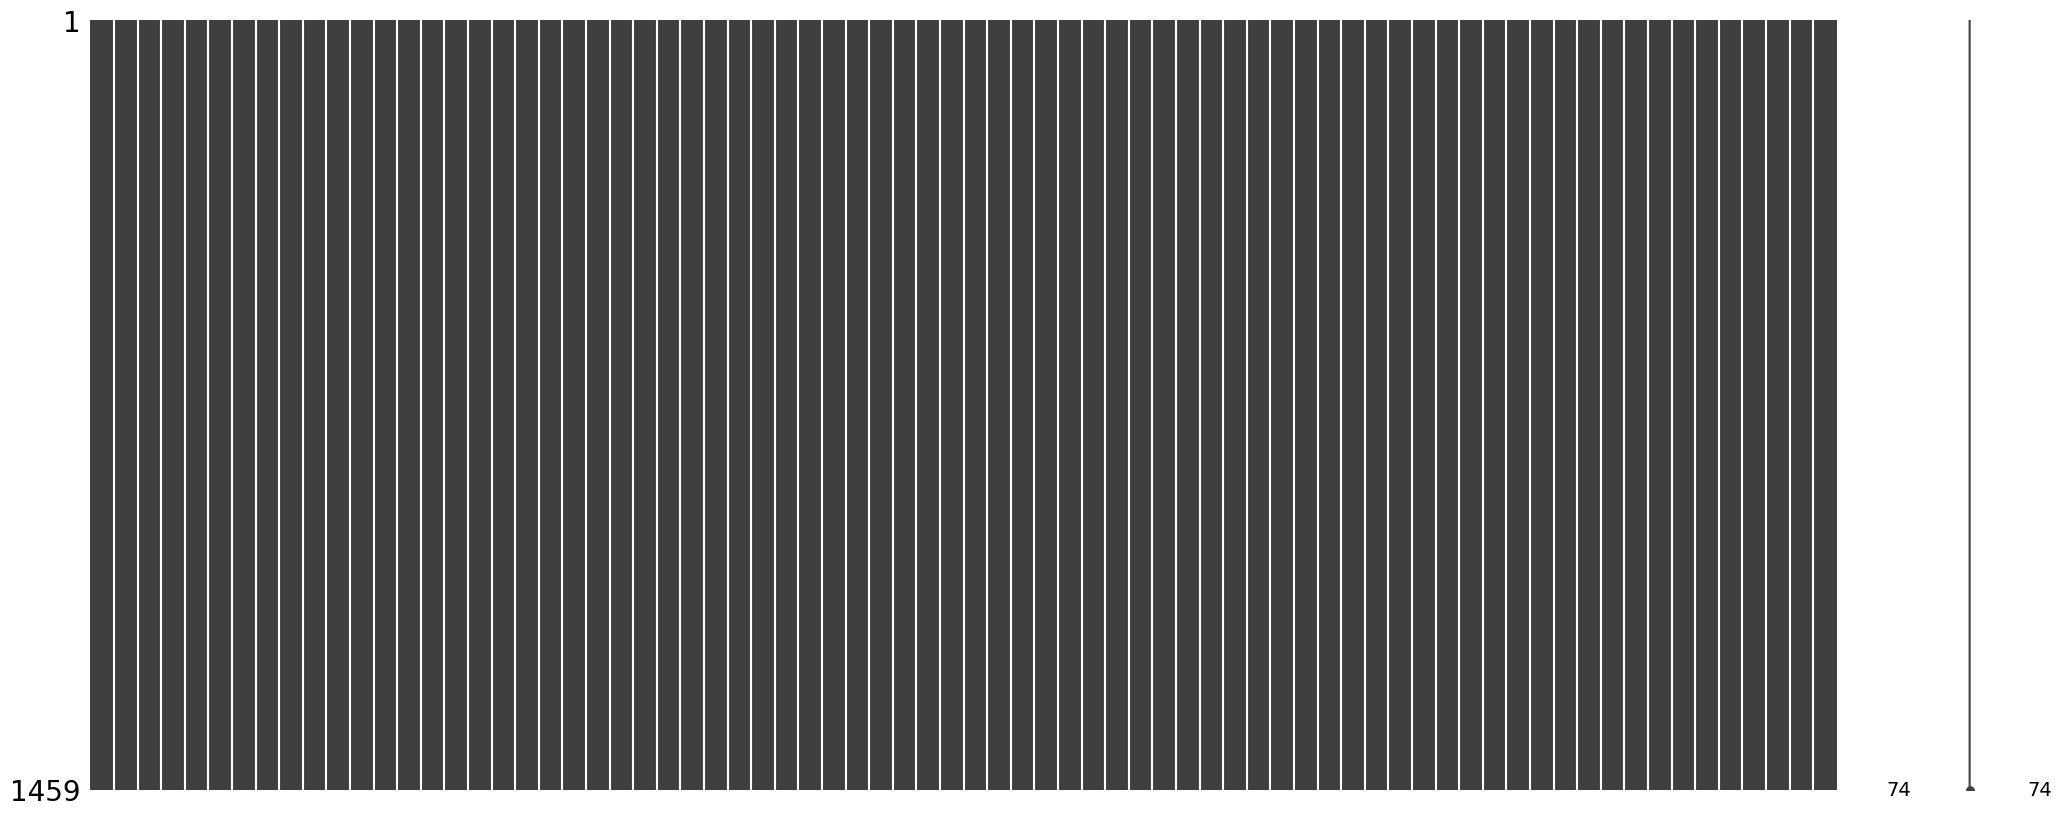

In [28]:
msn.matrix(df_test)

#### 对于连续型属性数据标准化

In [29]:
X_test = df_test.copy().drop(columns=["Id"])

In [30]:
X_test[type_col['continue']] = scaler.transform(X_test[type_col['continue']])

In [31]:
display(X_test[type_col['continue']].head())

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   -0.872563  0.110763    -0.795151     0.381743  -0.340077     -1.156380   
1   -0.872563  0.375850    -0.071836     0.381743  -0.439440     -1.301740   
2    0.073375  0.332053    -0.795151    -0.517200   0.852269      0.636400   
3    0.073375 -0.054002    -0.071836     0.381743   0.885390      0.636400   
4    1.492282 -0.552407     1.374795    -0.517200   0.686666      0.345679   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  EnclosedPorch  \
0    0.053428    0.604293  -0.672923    -0.400017  ...      -0.359325   
1    1.051363   -0.288653  -0.365032     0.619239  ...      -0.359325   
2    0.761852   -0.288653  -0.974021    -0.295127  ...      -0.359325   
3    0.347326   -0.288653  -0.550672    -0.299687  ...      -0.359325   
4   -0.396190   -0.288653   1.018211     0.507509  ...      -0.359325   

   3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold   YrSold  \
0  -0.116339     1.882709 -0.068692  -0.087688 -0.119110  1.64521   
1  -0.116339    -0.270208 -0.068692  25.116309 -0.119110  1.64521   
2  -0.116339    -0.270208 -0.068692  -0.087688 -1.229111  1.64521   
3  -0.116339    -0.270208 -0.068692  -0.087688 -0.119110  1.64521   
4  -0.116339     2.313293 -0.068692  -0.087688 -1.969111  1.64521   

   LotFrontage  MasVnrArea  GarageYrBlt  
0     0.451936   -0.574410    -0.729838  
1     0.497357    0.023903    -0.854909  
2     0.179413   -0.574410     0.771015  
3     0.361095   -0.463612     0.812705  
4    -1.228623   -0.574410     0.562563  

[5 rows x 36 columns]

#### 对于离散属性onehot编码

In [32]:
encoded_discrete_arr = encoder.transform(X_test[type_col['discrete']])
encoded_discrete_df = pd.DataFrame(encoded_discrete_arr, columns=encoder.get_feature_names_out(type_col['discrete']))
X_test = pd.concat([X_test.drop(columns=type_col['discrete']), encoded_discrete_df], axis=1)
display(X_test.head())

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   -0.872563     0.451936  0.110763    -0.795151     0.381743  -0.340077   
1   -0.872563     0.497357  0.375850    -0.071836     0.381743  -0.439440   
2    0.073375     0.179413  0.332053    -0.795151    -0.517200   0.852269   
3    0.073375     0.361095 -0.054002    -0.071836     0.381743   0.885390   
4    1.492282    -1.228623 -0.552407     1.374795    -0.517200   0.686666   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0     -1.156380   -0.574410    0.053428    0.604293  ...             0.0   
1     -1.301740    0.023903    1.051363   -0.288653  ...             0.0   
2      0.636400   -0.574410    0.761852   -0.288653  ...             0.0   
3      0.636400   -0.463612    0.347326   -0.288653  ...             0.0   
4      0.345679   -0.574410   -0.396190   -0.288653  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    0.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   1.0                    0.0  

[5 rows x 266 columns]

### 验证训练集和测试集在预处理之后对应列是否相同

In [33]:
xtrainc = X_train.columns.to_list()
xtestc = X_test.columns.to_list()
if len(xtrainc) != len(xtestc):
    raise ValueError("表结构不同")
if len(xtrainc) == len(xtestc):
    for i in range(len(xtrainc)):
        if xtrainc[i] != xtestc[i]:
            raise ValueError("表结构不同")

### 进行预测

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
y_test_id = df_test['Id'].to_list()
if len(y_test_id)!=len(y_test_pred):
    raise ValueError('')

In [36]:
res = pd.DataFrame(data={
    'Id': y_test_id,
    'SalePrice': y_test_pred
})
res.to_csv(f'res.csv', index=False)
res

Id  SalePrice
0     1461  128350.00
1     1462  156391.32
2     1463  181188.60
3     1464  180211.35
4     1465  196018.89
...    ...        ...
1454  2915   87086.00
1455  2916   87928.42
1456  2917  151970.87
1457  2918  116225.50
1458  2919  229271.32

[1459 rows x 2 columns]